In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import glob
from unidecode import unidecode


In [37]:
data_path = './data/processed/2024_01_19_clean_player_data.csv'
df = pd.read_csv(data_path)

duplicate_players = df[df.duplicated(subset=['Player'], keep=False)]

duplicate_players_same_team = duplicate_players[duplicate_players.duplicated(subset=['Player', 'Team'], keep=False)]

df = df.drop_duplicates(subset=['Player', 'Team'], keep='first')


In [43]:
df_cleaned[df_cleaned['Player'] == 'Elias Pettersson']

,Unnamed: 0,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,...,FOL,FO%,Ht,Wt,S/C,Exp,Team,specific_pos,Cap%,Salary
529,529,Elias Pettersson,25.0,C,45.0,24.0,35.0,59.0,19.0,4.0,...,228.0,48.5,6-2,176.0,L/-,5.0,VAN,"C, LW",8.8,7350000.0


In [35]:
df[df.duplicated('Player', keep=False)]

,Unnamed: 0,Player,Age,Pos,GP,G,A,PTS,+/-,PIM,...,FOL,FO%,Ht,Wt,S/C,Exp,Team,specific_pos,Cap%,Salary
41,41,Sebastian Aho,26.0,F,40.0,15.0,33.0,48.0,8.0,18.0,...,232.0,53.7,6-0,176.0,L/-,7.0,CAR,C,10.1,8460250.0
42,42,Sebastian Aho,26.0,F,40.0,15.0,33.0,48.0,8.0,18.0,...,232.0,53.7,6-0,176.0,L/-,7.0,CAR,LD,1.0,825000.0
43,43,Sebastian Aho,27.0,D,35.0,1.0,5.0,6.0,-9.0,6.0,...,0.0,NaN,5-10,186.0,L/-,4.0,NYI,C,10.1,8460250.0
44,44,Sebastian Aho,27.0,D,35.0,1.0,5.0,6.0,-9.0,6.0,...,0.0,NaN,5-10,186.0,L/-,4.0,NYI,LD,1.0,825000.0
324,324,Jacob Bryson,26.0,D,3.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,NaN,5-9,176.0,L/-,3.0,BUF,LD/RD,2.2,1850000.0
325,325,Jacob Bryson,26.0,D,3.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,NaN,5-9,176.0,L/-,3.0,BUF,LD/RD,2.2,1850000.0
529,529,Elias Pettersson,25.0,C,45.0,24.0,35.0,59.0,19.0,4.0,...,228.0,48.5,6-2,176.0,L/-,5.0,VAN,"C, LW",8.8,7350000.0
530,530,Elias Pettersson,25.0,C,45.0,24.0,35.0,59.0,19.0,4.0,...,228.0,48.5,6-2,176.0,L/-,5.0,VAN,"C, LW",8.8,7350000.0


In [26]:
wing_df = df[(df['Pos'] == 'LW') | (df['Pos'] == 'RW')]
center_df = df[df['Pos'] == 'C']
forward_df = pd.concat([wing_df, center_df])

defense_df = df[df['Pos'] == 'D']
goalie_df = df[df['Pos'] == 'G']

In [27]:
df.columns

Index(['Unnamed: 0', 'Player', 'Age', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-',
       'PIM', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'S%', 'TOI',
       'ATOI', 'OPS', 'DPS', 'PS', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%', 'Ht',
       'Wt', 'S/C', 'Exp', 'Team', 'specific_pos', 'Cap%', 'Salary'],
      dtype='object')

In [28]:
drop_columns = [ 'Pos','Team', 'specific_pos', 'Cap%', 'TOI', 'S/C', 'Ht', 'Wt', 'SH.1', 'PP.1','FO%']

defense_df = defense_df.drop(columns=drop_columns)

defense_df = defense_df.dropna()

In [29]:
def prep_atoi(atoi_string):
    list = atoi_string.split(':')
    minutes = int(list[0])
    seconds = int(list[1])

    return minutes + (seconds/60)

defense_df['Clean_ATOI'] = defense_df['ATOI'].apply(prep_atoi)
defense_df = defense_df.drop(columns=['ATOI'])

In [30]:
defense_df.isna().sum()

Unnamed: 0    0
Player        0
Age           0
GP            0
G             0
A             0
PTS           0
+/-           0
PIM           0
EV            0
PP            0
SH            0
GW            0
EV.1          0
S             0
S%            0
OPS           0
DPS           0
PS            0
BLK           0
HIT           0
FOW           0
FOL           0
Exp           0
Salary        0
Clean_ATOI    0
dtype: int64

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import sklearn
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'forward_df'
# Replace 'Salary' with the actual column name you want to predict

# Features (X) - Exclude the target column and player name column
X = defense_df.drop(['Salary', 'Player'], axis=1)

# Target (y) - The column you want to predict
y = defense_df['Salary']

# Save the player names for later
player_names = defense_df['Player']

# One-hot encode or label encode the player names
# Assuming one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
# Adjust the test_size parameter as needed
X_train, X_test, y_train, y_test, player_names_train, player_names_test = sklearn.model_selection.train_test_split(
    X_encoded, y, player_names, test_size=0.2, random_state=42
)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Fit the model to your training data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the indices of features sorted by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importance ranking with original column names
print("Feature Importance Ranking:")
for i, index in enumerate(sorted_indices):
    original_column_name = X_encoded.columns[index]
    print(f"{i + 1}. Feature '{original_column_name}': {feature_importances[index]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()





ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
defense_features = ['S', 'Exp', 'A', 'PTS', 'G', 'BLK', 'HIT', 'PS', '+/-', 'GP', 'Salary', 'Player', 'Clean_ATOI']

defense_importance_filtered = defense_df[defense_features]





Mean Squared Error: 2563559378066.347
R-squared: 0.5932308128574608


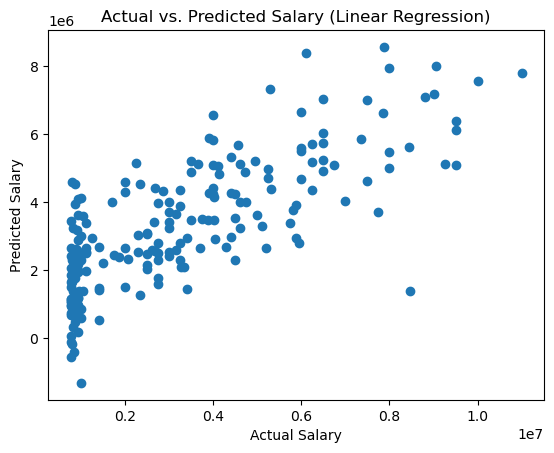

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named 'defense_importance_filtered'
# Replace 'Salary' with the actual column name you want to predict


player_names = defense_importance_filtered['Player']


# Features (X) - Exclude the target column
X = defense_importance_filtered.drop(['Salary', 'Player'], axis=1)

# Target (y) - The column you want to predict
y = defense_importance_filtered['Salary']

# Split the data into training and testing sets
# Adjust the test_size parameter as needed
X_train, X_test, y_train, y_test, player_names_train, player_names_test = train_test_split(
    X, y, player_names, test_size=0.2, random_state=42
)
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to your training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_all = linear_model.predict(X)


results_df = pd.DataFrame({'Player': player_names, 'Actual_Salary': y, 'Predicted_Salary': predictions_all})




# Evaluate the model
mse = mean_squared_error(y, predictions_all)
r2 = r2_score(y, predictions_all)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting actual vs. predicted values
plt.scatter(y, predictions_all)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary (Linear Regression)")
plt.show()


In [ ]:
results_df['Difference'] = results_df['Actual_Salary'] - results_df['Predicted_Salary']

total_defensemen = results_df.shape[0]

In [ ]:
expererience_df = defense_df[['Player', 'Exp']]



overpaid = results_df[results_df['Difference'] >= 1e6 ]

overpaid = pd.merge(overpaid, expererience_df, on='Player', how='inner')

underpaid = results_df[results_df['Difference'] <= -1e6 ]

underpaid = pd.merge(underpaid, expererience_df, on='Player', how='inner')

In [ ]:
overpaid.sort_values(by='Difference', ascending=False)

,Player,Actual_Salary,Predicted_Salary,Difference,Exp
3,Sebastian Aho,8460250.0,1.369298e+06,7.090952e+06,4.0
4,Sebastian Aho,8460250.0,1.369298e+06,7.090952e+06,4.0
0,Adam Fox,9500000.0,5.097443e+06,4.402557e+06,4.0
42,Darnell Nurse,9250000.0,5.116882e+06,4.133118e+06,9.0
5,Dmitry Orlov,7750000.0,3.708205e+06,4.041795e+06,11.0
14,Charlie McAvoy,9500000.0,6.121285e+06,3.378715e+06,6.0
40,Drew Doughty,11000000.0,7.796559e+06,3.203441e+06,15.0
25,Nate Schmidt,5950000.0,2.801000e+06,3.149000e+06,10.0
36,Seth Jones,9500000.0,6.380218e+06,3.119782e+06,10.0
23,Thomas Chabot,8000000.0,5.017542e+06,2.982458e+06,7.0


In [ ]:
underpaid.sort_values(by='Difference', ascending=False)

,Player,Actual_Salary,Predicted_Salary,Difference,Exp
5,Chad Ruhwedel,800000.0,1.815566e+06,-1.015566e+06,11.0
27,Dylan DeMelo,3000000.0,4.017766e+06,-1.017766e+06,8.0
42,Kevin Korchinski,918333.0,1.943508e+06,-1.025175e+06,0.0
52,Jackson LaCombe,925000.0,1.961958e+06,-1.036958e+06,1.0
21,Justin Barron,925000.0,1.982105e+06,-1.057105e+06,2.0
1,Nick Seeler,775000.0,1.859202e+06,-1.084202e+06,5.0
37,Nick Leddy,4000000.0,5.101507e+06,-1.101507e+06,13.0
53,Mario Ferraro,3250000.0,4.360038e+06,-1.110038e+06,4.0
48,Rasmus Andersson,4550000.0,5.675145e+06,-1.125145e+06,7.0
57,Henry Thrun,912500.0,2.054822e+06,-1.142322e+06,1.0
